In [1]:
import numpy as np
import tensorflow as tf

__Forward algorithm__ is used to calcualte a _belief state_ - the probability of a state a a certain time $t$ given a history of observations $y()$ and the previous state $x_{t-1}$. The probability for the _belief state_ is written as $P(x_t|y_{1:t})$.

Below is a example of a hidden markov model where $x$ is the hidden state and $y$ is the observations.

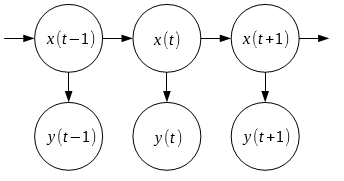


In [5]:
class HMM(object):
    def __init__(self, initial_prob, trans_prob, obs_prob):
        # Store parameters
        self.N = np.size(initial_prob)
        self.initial_prob = initial_prob
        self.trans_prob = trans_prob
        self.emission = tf.constant(obs_prob)
        
        # Sanity check matrices
        assert self.initial_prob.shape == (self.N,1)
        assert self.trans_prob.shape == (self.N, self.N)
        assert obs_prob.shape[0] == self.N
        
        # Placehodler for forward-algorithm
        self.obs_idx = tf.placeholder(tf.int32)
        self.fwd = tf.placeholder(tf.float64)
        
    # Helper function to access a row from the emission matrix.
    def get_emission(self, obs_idx):
        # Where to slice amtrix
        slice_location = [0, obs_idx]
        num_rows = tf.shape(self.emission)[0]
        slice_shape = [num_rows, 1]
        return tf.slice(self.emission, slice_location, slice_shape)
    
    # Init forward_algorithms cache
    def forward_init_op(self):
        obs_prob = self.get_emission(self.obs_idx)
        fwd = tf.multiply(self.initial_prob, obs_prob)
        return fwd
    
    # Update cache after each observation
    # Executing a forward stop
    def forward_op(self):
        transitions = tf.matmul(self.fwd, tf.transpose(self.get_emission(self.obs_idx)))
        weighted_transitions = transitions * self.trans_prob
        fwd = tf.reduce_sum(weighted_transitions, 0)
        return tf.reshape(fwd, tf.shape(self.fwd))

In [6]:
# Forward algorithm
def forward_algorithm(sess, hmm, observations):
    fwd = sess.run(hmm.forward_init_op(), feed_dict={hmm.obs_idx: observations[0]})
    for t in range(1, len(observations)):
        fwd = sess.run(hmm.forward_op(), feed_dict={hmm.obs_idx: observations[t], hmm.fwd: fwd})
    prob = sess.run(tf.reduce_sum(fwd))
    return prob

```
states = ('Rainy', 'Sunny')

observations_lookup = ('walk', 'shop', 'clean')

observations = {'walk', 'shop', 'shop', 'clean'. 'shop'}

start_probability = {'Rainy': 0.6, 'Sunny': 0.4}

transition_probability = 
{
  'Rainy : {'Rainy': 0.7, 'Sunny': 0.3},
  'Sunny': {'Rainy': 0.4, 'Sunny': 0.6},
}

emission_probability = 
{
   'Rainy : {'walk': 0.1, 'shop': 0.4, 'clean': 0.5},
   'Sunny': {'walk': 0.6, 'shop': 0.3, 'clean': 0.1},
}

```

In [7]:
if __name__ == '__main__':
    # Initial probability vector
    initial_prob = np.array([[0.6],[0.4]])
    
    # Transition probability matrix
    trans_prob = np.array([[0.7, 0.3],
                           [0.4, 0.6]])
    
    # Emission probability matrix
    obs_prob = np.array([[0.1, 0.4, 0.5],
                         [0.6, 0.3, 0.1]])
    
    hmm = HMM(initial_prob=initial_prob, trans_prob=trans_prob,obs_prob=obs_prob)
    observations = [0, 1, 1, 2, 1]
    
    with tf.Session() as sess:
        prob = forward_algorithm(sess, hmm, observations)
        print('Probability of observing {} is {}'.format(observations, prob))

Probability of observing [0, 1, 1, 2, 1] is 0.004540300799999999
